# Russia Real Estate 2021 Classterization

In [ ]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
from google.colab import files # чтобы загружать файлы в облако через проводник

import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации

from sklearn.model_selection import train_test_split #  функция разбиения на тренировочную и тестовую выборку
from sklearn.preprocessing import MinMaxScaler # Объект Нормализации от Scikit-learn

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Для выполнения Домашнего задания №3 я решил продолжить работу с [набором данных о жилой недвижимости в России в 2021](https://www.kaggle.com/datasets/mrdaniilak/russia-real-estate-2021)

Структура данных  
date - дата внесения записи о характеристиках помещения  
price - цена  
level - этаж помещения  
levels - число этажей в здании  
rooms - число комнат в помещении (метка "-1" присвоена квартирам-студиям)  
area - площадь квартиры  
kitchen_area - площадь кухни  
geo_lat - координата широты расположения объекта  
geo_lon - координата долготы расположения объекта  
building_type - тип фасада здания: 0 - Don't know. 1 - Other. 2 - Panel. 3 - Monolithic. 4 - Brick. 5 - Blocky. 6 - Wooden  
object_type - первичка ('0') или вторичка ('2')  
postal_code - почтовый индекс  
street_id - иденитфикатор улицы
id_region - код региона  
house_id - идентификатор здания

Предварительную обработку реализовал в ДЗ [№1](https://colab.research.google.com/drive/1ng1avCa_jAlq2im4T9N66uxhMbAl_-Ni), [2](https://colab.research.google.com/drive/15ighY-bgnrE8kayyB68FmYbuyPYIDe59?usp=sharing#scrollTo=_swzxdQ3pW5m), [4](https://colab.research.google.com/drive/1QCb7nIq3g6f2kttKhuBE7eJ2ferPIvsR?usp=sharing)  


## Импорт

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/russia_real_estate_DF.csv', delimiter=',')

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df_del = pd.read_csv('/content/drive/MyDrive/russia_real_estate_DF_del_vibros.csv', delimiter=',')

In [ ]:
df_del = pd.DataFrame(df_del)

In [ ]:
df.head()

date     price  level  levels  rooms  area  kitchen_area    geo_lat  \
0  2021-01-01   2451300     15      31      1  30.3           0.1  56.780112   
1  2021-01-01   1450000      5       5      1  33.0           6.0  44.608154   
2  2021-01-01  10700000      4      13      3  85.0          12.0  55.540060   
3  2021-01-01   3100000      3       5      3  82.0           9.0  44.608154   
4  2021-01-01   2500000      2       3      1  30.0           9.0  44.738685   

     geo_lon  building_type  object_type  postal_code  id_region  
0  60.699355              0            2     620000.0         66  
1  40.138381              0            0     385000.0          1  
2  37.725112              3            0     142701.0         50  
3  40.138381              0            0     385000.0          1  
4  37.713668              3            2     353960.0         23

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112237 entries, 0 to 112236
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   date           112237 non-null  object 
 1   price          112237 non-null  int64  
 2   level          112237 non-null  int64  
 3   levels         112237 non-null  int64  
 4   rooms          112237 non-null  int64  
 5   area           112237 non-null  float64
 6   kitchen_area   112237 non-null  float64
 7   geo_lat        112237 non-null  float64
 8   geo_lon        112237 non-null  float64
 9   building_type  112237 non-null  int64  
 10  object_type    112237 non-null  int64  
 11  postal_code    112237 non-null  float64
 12  id_region      112237 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 11.1+ MB


In [ ]:
df_del.head()

date     price  level  levels  rooms  area  kitchen_area    geo_lat  \
0  2021-01-01   2451300     15      31      1  30.3           0.1  56.780112   
1  2021-01-01  10700000      4      13      3  85.0          12.0  55.540060   
2  2021-01-01   1450000      5       5      2  47.0           6.0  48.511172   
3  2021-01-01   2290000      2       2      2  53.2          16.0  53.164362   
4  2021-01-01   3350000      1      19      1  10.1           2.0  55.778026   

     geo_lon  building_type  object_type  postal_code  id_region  
0  60.699355              0            2     620000.0         66  
1  37.725112              3            0     142701.0         50  
2  44.566846              2            0     400096.0         34  
3  45.033956              5            0     440003.0         58  
4  37.540147              3            0     123007.0         77

In [ ]:
df_del.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78079 entries, 0 to 78078
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           78079 non-null  object 
 1   price          78079 non-null  int64  
 2   level          78079 non-null  int64  
 3   levels         78079 non-null  int64  
 4   rooms          78079 non-null  int64  
 5   area           78079 non-null  float64
 6   kitchen_area   78079 non-null  float64
 7   geo_lat        78079 non-null  float64
 8   geo_lon        78079 non-null  float64
 9   building_type  78079 non-null  int64  
 10  object_type    78079 non-null  int64  
 11  postal_code    78079 non-null  float64
 12  id_region      78079 non-null  int64  
dtypes: float64(5), int64(7), object(1)
memory usage: 7.7+ MB


В качестве целевой метки для задачи классификации используем object_type - первчный или вторичный тип жилья. Для наглядности изменим значение первички с "0" на "1"

In [ ]:
df.loc[df['object_type']==0, ['object_type']] = 1
df_del.loc[df_del['object_type']==0, ['object_type']] = 1

In [ ]:
df["building_type"] = df["building_type"].astype("object")
df["object_type"] = df["object_type"].astype("object")
df["postal_code"] = df["postal_code"].astype("object")
df["id_region"] = df["id_region"].astype("object")

df_del["building_type"] = df_del["building_type"].astype("object")
df_del["object_type"] = df_del["object_type"].astype("object")
df_del["postal_code"] = df_del["postal_code"].astype("object")
df_del["id_region"] = df_del["id_region"].astype("object")

In [ ]:
cat_columns = [] # определяем категиральные признаки
num_columns = [] # определяем числовые признаки

for column_name in df.columns:
    if (df[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['date', 'building_type', 'object_type', 'postal_code', 'id_region'] 
 len =  5
numerical columns:	  ['price', 'level', 'levels', 'rooms', 'area', 'kitchen_area', 'geo_lat', 'geo_lon'] 
 len =  8


## t-SNE

In [ ]:
from sklearn.manifold import TSNE # TSNE от scikit-learn

### 1.1 t-SNE для датасета С выбросами (perplexity = 35, n_iter = 300)

In [ ]:
X1 = df[num_columns].values  # берем только числовые данные
y1 = df['object_type'].values # для класстеризации целевой признак - тип жилья (первичка или вторичка)

features_names = df[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.1, random_state=42)

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 300 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 35 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results = tsne.fit_transform(X1)

[t-SNE] Computing 106 nearest neighbors...
[t-SNE] Indexed 113500 samples in 0.175s...
[t-SNE] Computed neighbors for 113500 samples in 6.464s...
[t-SNE] Computed conditional probabilities for sample 1000 / 113500
[t-SNE] Computed conditional probabilities for sample 2000 / 113500
[t-SNE] Computed conditional probabilities for sample 3000 / 113500
[t-SNE] Computed conditional probabilities for sample 4000 / 113500
[t-SNE] Computed conditional probabilities for sample 5000 / 113500
[t-SNE] Computed conditional probabilities for sample 6000 / 113500
[t-SNE] Computed conditional probabilities for sample 7000 / 113500
[t-SNE] Computed conditional probabilities for sample 8000 / 113500
[t-SNE] Computed conditional probabilities for sample 9000 / 113500
[t-SNE] Computed conditional probabilities for sample 10000 / 113500
[t-SNE] Computed conditional probabilities for sample 11000 / 113500
[t-SNE] Computed conditional probabilities for sample 12000 / 113500
[t-SNE] Computed conditional probab

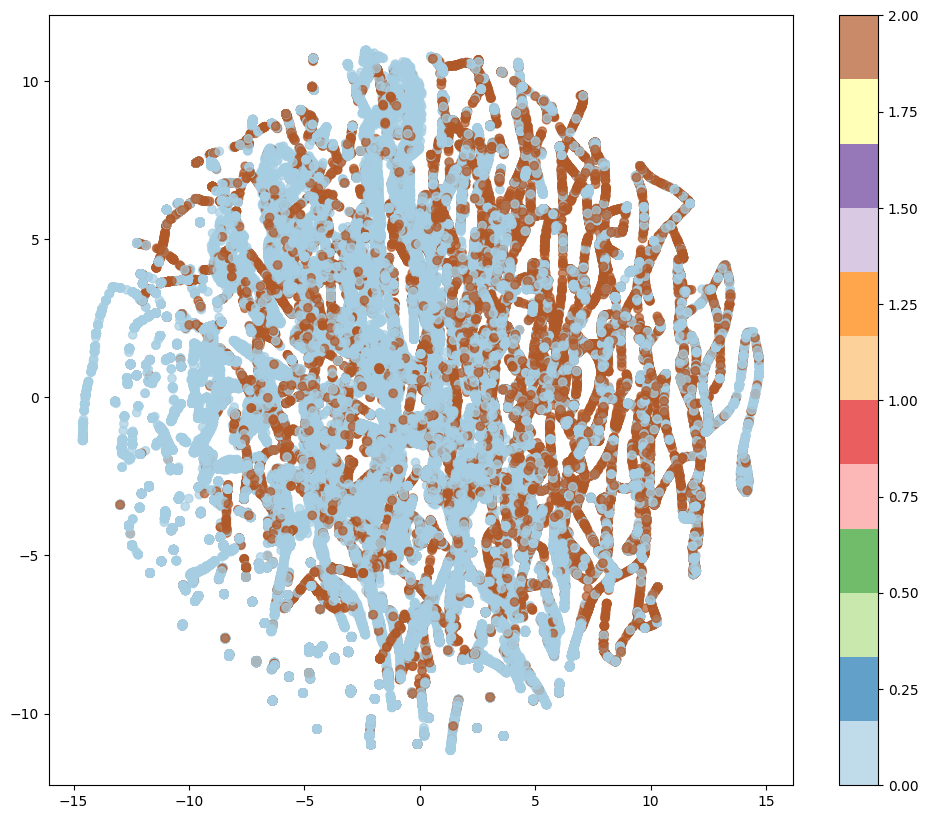

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1],
            c =df['object_type'].values, # подсветим по типу жилья:
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

In [ ]:
tsne_results

array([[ -4.9089108 ,  -0.67062926],
       [ -9.425733  , -10.365068  ],
       [ 12.127147  ,  -5.19519   ],
       ...,
       [ -5.575506  ,  -2.1935122 ],
       [  2.4048672 ,  11.645448  ],
       [  1.2983098 ,   3.0286708 ]], dtype=float32)

In [ ]:
df1 = df.copy()

In [ ]:
pca_names1 = ['pca-'+str(x+1) for x in range(tsne_results.shape[1])]
df1[pca_names1] = tsne_results

In [ ]:
df1

date     price  level  levels  rooms  area  kitchen_area  \
0       2021-01-01   2451300     15      31      1  30.3           0.1   
1       2021-01-01   1450000      5       5      1  33.0           6.0   
2       2021-01-01  10700000      4      13      3  85.0          12.0   
3       2021-01-01   3100000      3       5      3  82.0           9.0   
4       2021-01-01   2500000      2       3      1  30.0           9.0   
...            ...       ...    ...     ...    ...   ...           ...   
112232  2021-01-11   3800000      6      19      3  62.0           0.1   
112233  2021-01-11   3150000      3      17      2  57.4          10.5   
112234  2021-01-11   2000000     16      18      2  52.4           0.1   
112235  2021-01-11   4390000      2       7      1  56.0           0.1   
112236  2021-01-11   3900000      3       9      2  69.7           7.8   

          geo_lat    geo_lon building_type object_type postal_code id_region  \
0       56.780112  60.699355             0           2    620000.0        66   
1       44.608154  40.138381             0           1    385000.0         1   
2       55.540060  37.725112             3           1    142701.0        50   
3       44.608154  40.138381             0           1    385000.0         1   
4       44.738685  37.713668             3           2    353960.0        23   
...           ...        ...           ...         ...         ...       ...   
112232  56.520477  85.051660             4           1    634063.0        70   
112233  57.586661  39.900910             2           2    150006.0        76   
112234  55.983409  92.823905             2           2    660012.0        24   
112235  56.499977  84.948940             0           1    634009.0        70   
112236  50.579155  36.588859             4           1    308012.0        31   

            pca-1      pca-2  
0       -4.908911  -0.670629  
1       -9.425733 -10.365068  
2       12.127147  -5.195190  
3       -1.517826   4.383104  
4       -0.920555  -8.749855  
...           ...        ...  
112232   3.025591  -3.530526  
112233  -3.880005   6.075757  
112234  -5.575506  -2.193512  
112235   2.404867  11.645448  
112236   1.298310   3.028671  

[112237 rows x 15 columns]

### 1.2 t-SNE для датасета С выборосами (perplexity = 15, n_iter = 300)

In [ ]:
X2 = df[num_columns].values  # берем только числовые данные
y2 = df['object_type'].values # для класстеризации целевой признак - тип жилья (первичка или вторичка)

features_names = df[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.1, random_state=42)

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 300 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 15 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results2 = tsne.fit_transform(X2)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 112237 samples in 0.179s...
[t-SNE] Computed neighbors for 112237 samples in 2.765s...
[t-SNE] Computed conditional probabilities for sample 1000 / 112237
[t-SNE] Computed conditional probabilities for sample 2000 / 112237
[t-SNE] Computed conditional probabilities for sample 3000 / 112237
[t-SNE] Computed conditional probabilities for sample 4000 / 112237
[t-SNE] Computed conditional probabilities for sample 5000 / 112237
[t-SNE] Computed conditional probabilities for sample 6000 / 112237
[t-SNE] Computed conditional probabilities for sample 7000 / 112237
[t-SNE] Computed conditional probabilities for sample 8000 / 112237
[t-SNE] Computed conditional probabilities for sample 9000 / 112237
[t-SNE] Computed conditional probabilities for sample 10000 / 112237
[t-SNE] Computed conditional probabilities for sample 11000 / 112237
[t-SNE] Computed conditional probabilities for sample 12000 / 112237
[t-SNE] Computed conditional probabi

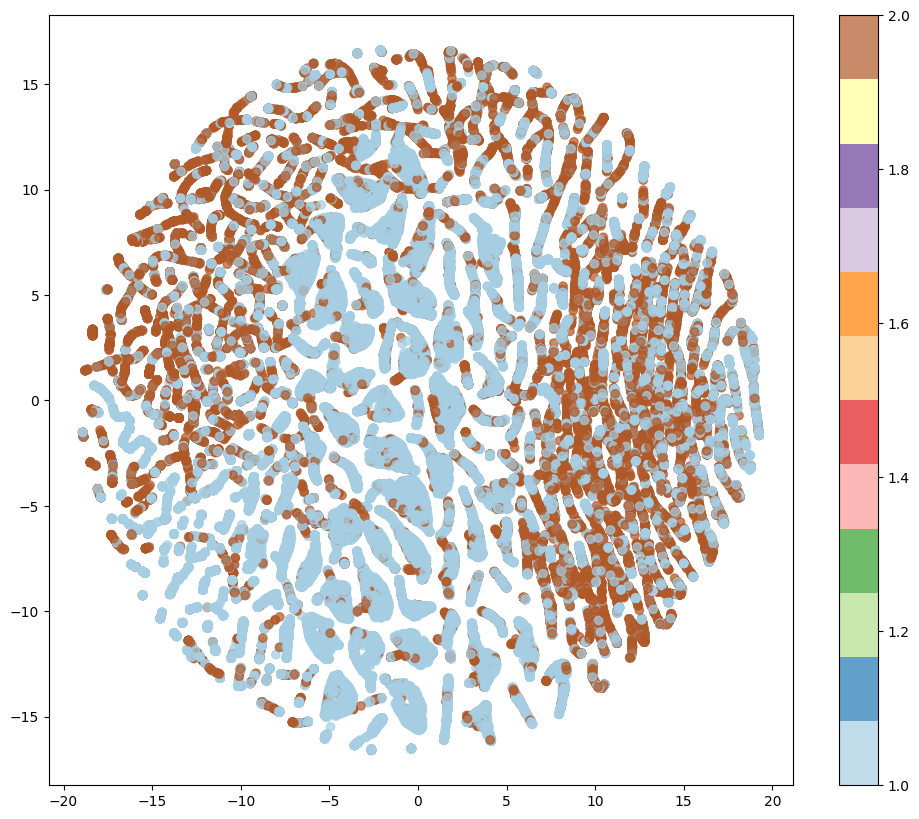

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results2[:,0],tsne_results2[:,1],
            c =df['object_type'].values, # подсветим по типу жилья:
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

In [ ]:
tsne_results2

array([[-4.1297145 ,  2.90724   ],
       [-7.753563  , -5.065745  ],
       [13.237959  , -9.043885  ],
       ...,
       [-4.741043  ,  2.1411958 ],
       [-2.3770843 , 14.171387  ],
       [ 4.457985  ,  0.50833845]], dtype=float32)

In [ ]:
df2 = df.copy()

In [ ]:
pca_names2 = ['pca-'+str(x+1) for x in range(tsne_results2.shape[1])]
df2[pca_names2] = tsne_results2

### 2.1 t-SNE для датасета БЕЗ выборосов (perplexity = 5)

In [ ]:
X3 = df_del[num_columns].values  # берем только числовые данные
y3 = df_del['object_type'].values # для класстеризации целевой признак - тип жилья (первичка или вторичка)

features_names = df_del[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.1, random_state=42)

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 250 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 5 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results3 = tsne.fit_transform(X3)

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 78079 samples in 0.308s...
[t-SNE] Computed neighbors for 78079 samples in 4.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 78079
[t-SNE] Computed conditional probabilities for sample 2000 / 78079
[t-SNE] Computed conditional probabilities for sample 3000 / 78079
[t-SNE] Computed conditional probabilities for sample 4000 / 78079
[t-SNE] Computed conditional probabilities for sample 5000 / 78079
[t-SNE] Computed conditional probabilities for sample 6000 / 78079
[t-SNE] Computed conditional probabilities for sample 7000 / 78079
[t-SNE] Computed conditional probabilities for sample 8000 / 78079
[t-SNE] Computed conditional probabilities for sample 9000 / 78079
[t-SNE] Computed conditional probabilities for sample 10000 / 78079
[t-SNE] Computed conditional probabilities for sample 11000 / 78079
[t-SNE] Computed conditional probabilities for sample 12000 / 78079
[t-SNE] Computed conditional probabilities for sam

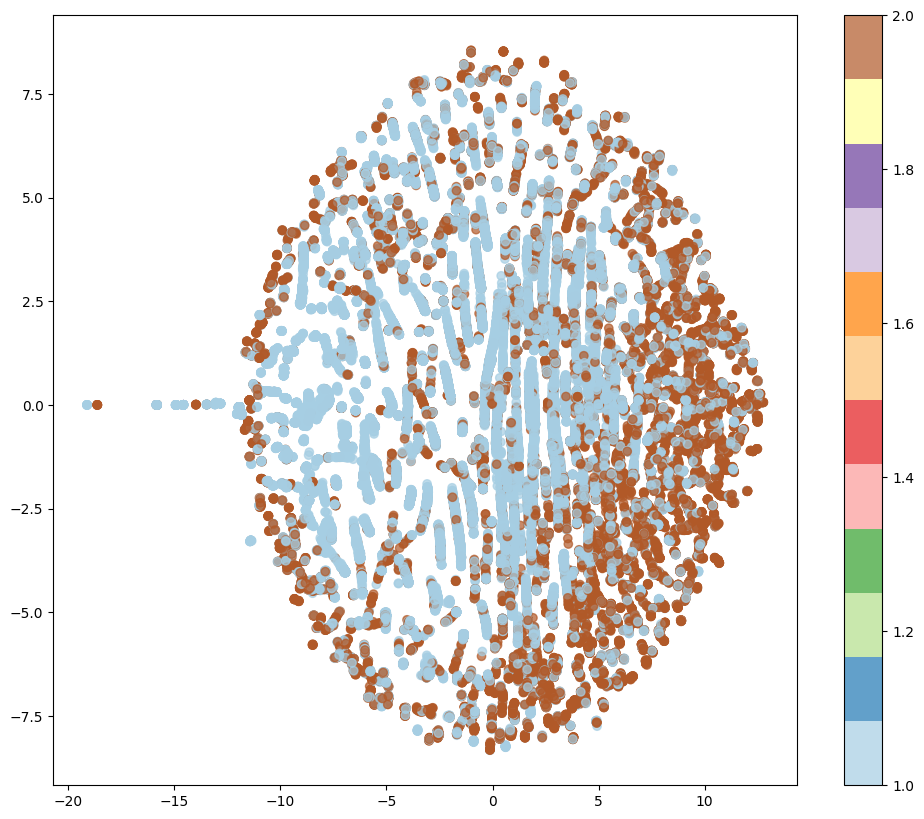

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results3[:,0],tsne_results[:,1],
            c =df_del['object_type'].values, # подсветим по типу жилья:
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

In [ ]:
tsne_results3

array([[-1.5856088, -5.972093 ],
       [ 7.4806023, -1.5992295],
       [-7.3511357, -1.923686 ],
       ...,
       [-5.390304 ,  4.548636 ],
       [ 4.4823723, -4.437587 ],
       [ 3.3574617, -3.8035607]], dtype=float32)

In [ ]:
df_del1 = df_del.copy()

In [ ]:
pca_names3 = ['pca-'+str(x+1) for x in range(tsne_results3.shape[1])]
df_del1[pca_names3] = tsne_results3

### 2.2 t-SNE для датасета БЕЗ выборосов (perplexity = 15)

In [ ]:
X4 = df_del[num_columns].values  # берем только числовые данные
y4 = df_del['object_type'].values # для класстеризации целевой признак - тип жилья (первичка или вторичка)

features_names = df_del[num_columns].columns
# разбиваем на тестовую и тренировочную
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.1, random_state=42)

In [ ]:
#@title Гиперпараметры tSNE {run: "auto" }
n_iter = 400 #@param {type:"slider", min:250, max:500, step:25}
perplexity = 15 #@param {type:"slider", min:5, max:50, step:5}

# создаем объект класса с указанием гиперпараметров
tsne = TSNE(n_components=2,
            verbose=1,
            perplexity=perplexity,
            n_iter=n_iter, )

# обучаем и сразу трансформируем
# потому что это t-SNE
# и чисто "математически" нельзя отдельно fit и transform
tsne_results4 = tsne.fit_transform(X4)

[t-SNE] Computing 46 nearest neighbors...
[t-SNE] Indexed 78079 samples in 0.233s...
[t-SNE] Computed neighbors for 78079 samples in 3.048s...
[t-SNE] Computed conditional probabilities for sample 1000 / 78079
[t-SNE] Computed conditional probabilities for sample 2000 / 78079
[t-SNE] Computed conditional probabilities for sample 3000 / 78079
[t-SNE] Computed conditional probabilities for sample 4000 / 78079
[t-SNE] Computed conditional probabilities for sample 5000 / 78079
[t-SNE] Computed conditional probabilities for sample 6000 / 78079
[t-SNE] Computed conditional probabilities for sample 7000 / 78079
[t-SNE] Computed conditional probabilities for sample 8000 / 78079
[t-SNE] Computed conditional probabilities for sample 9000 / 78079
[t-SNE] Computed conditional probabilities for sample 10000 / 78079
[t-SNE] Computed conditional probabilities for sample 11000 / 78079
[t-SNE] Computed conditional probabilities for sample 12000 / 78079
[t-SNE] Computed conditional probabilities for sam

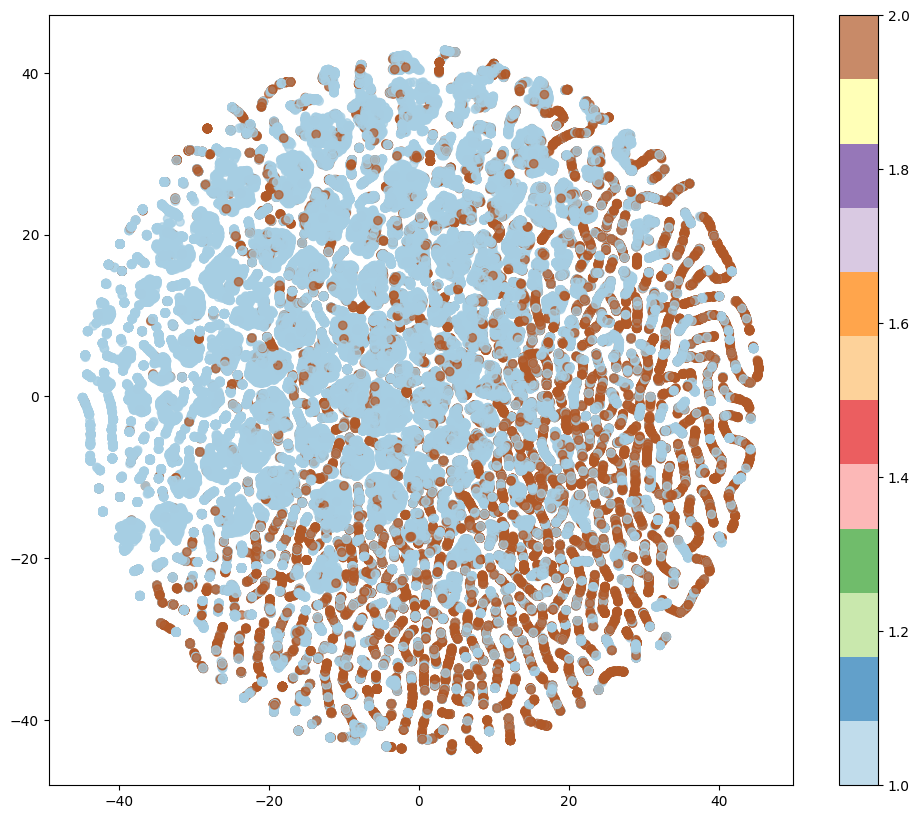

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(tsne_results4[:,0],tsne_results[:,1],
            c =df_del['object_type'].values, # подсветим по типу жилья:
            alpha = 0.7, cmap ='Paired' ,)
plt.colorbar();

In [ ]:
tsne_results4

array([[ -7.359113  ,  11.160067  ],
       [ 38.98777   ,  -0.54713583],
       [-23.801235  , -15.335502  ],
       ...,
       [-18.028902  ,  31.933277  ],
       [ 19.95148   , -22.981567  ],
       [  5.764269  ,  29.571487  ]], dtype=float32)

In [ ]:
df_del2 = df_del.copy()

In [ ]:
pca_names4 = ['pca-'+str(x+1) for x in range(tsne_results4.shape[1])]
df_del2[pca_names4] = tsne_results4

## DBSCAN для кластеризации

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

### Кластеризация для данных C выбросами после обработки t-SNE с разными значениями perplexity и n_iter

#### perplexity = 35, n_iter = 300

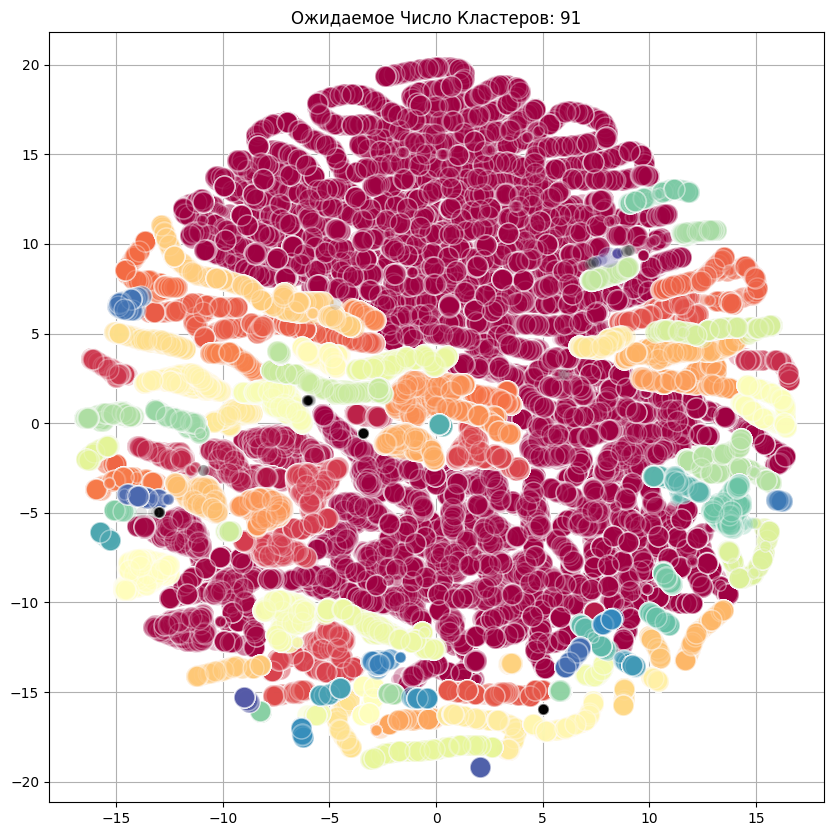

In [ ]:
#@title Кластеризация DBSCAN { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
pca_x =  2 #@param {type:"slider", min:1, max:2, step:1}
pca_y = 1 #@param {type:"slider", min:1, max:2, step:1}
#@markdown ### epsilon
eps = 0.6 #@param {type:"slider", min:0.05, max:1.0, step:0.05}
#@markdown ### minimum sample
min_samples = 50 #@param {type:"slider", min:0, max:50, step:5}

X_cluster1 = df1.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(X_cluster1)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0]

    class_member_mask = (labels == k)

    xy = X_cluster1[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=15, alpha=0.3)

    xy = X_cluster1[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=8, alpha=0.1)

plt.grid()
plt.title('Ожидаемое Число Кластеров: %d' % n_clusters_);

#### perplexity = 15, n_iter = 300

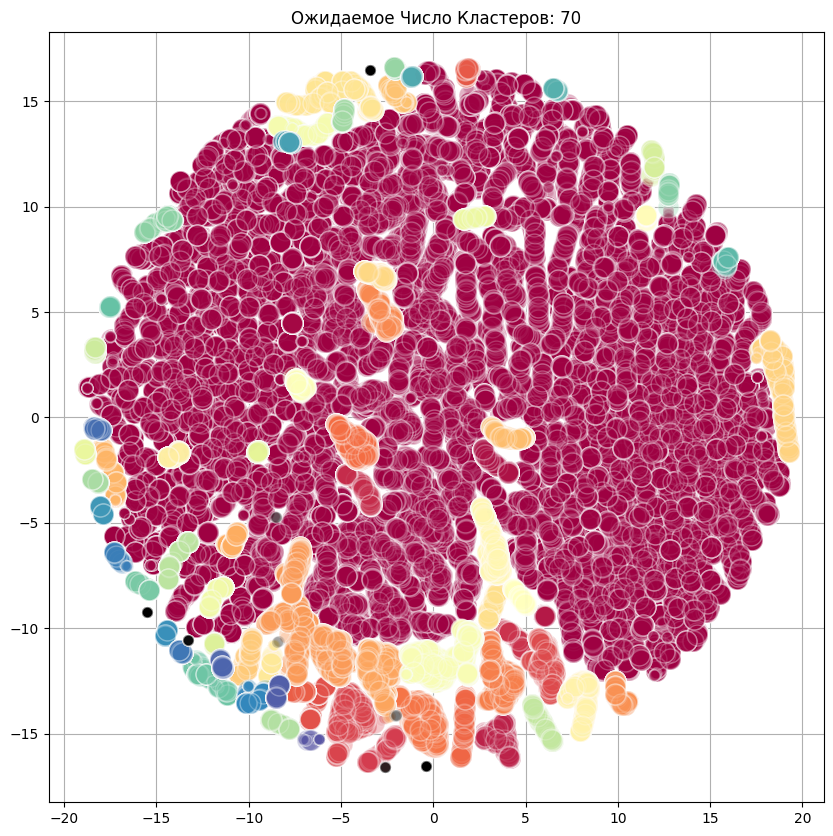

In [ ]:
#@title Кластеризация DBSCAN { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
pca_x =  1 #@param {type:"slider", min:1, max:2, step:1}
pca_y = 2 #@param {type:"slider", min:1, max:2, step:1}
#@markdown ### epsilon
eps = 0.65 #@param {type:"slider", min:0.05, max:1.0, step:0.05}
#@markdown ### minimum sample
min_samples = 50 #@param {type:"slider", min:0, max:50, step:5}

X_cluster2 = df2.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(X_cluster2)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0]

    class_member_mask = (labels == k)

    xy = X_cluster2[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=15, alpha=0.3)

    xy = X_cluster2[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=8, alpha=0.1)

plt.grid()
plt.title('Ожидаемое Число Кластеров: %d' % n_clusters_);

### Кластеризация для данных БЕЗ выбросов после обработки t-SNE с разными значениями perplexity и n_iter

#### perplexity = 5, n_iter = 250

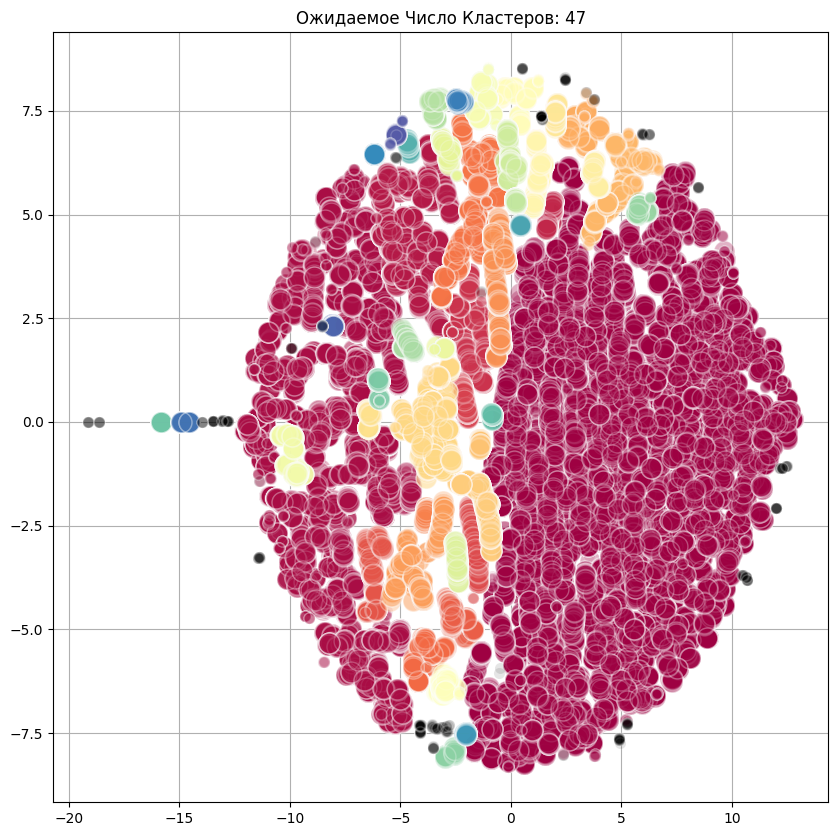

In [ ]:
#@title Кластеризация DBSCAN { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
pca_x =  1 #@param {type:"slider", min:1, max:2, step:1}
pca_y = 2 #@param {type:"slider", min:1, max:2, step:1}
#@markdown ### epsilon
eps = 0.45 #@param {type:"slider", min:0.05, max:1.0, step:0.05}
#@markdown ### minimum sample
min_samples = 50 #@param {type:"slider", min:0, max:50, step:5}

X_cluster3 = df_del1.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(X_cluster3)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0]

    class_member_mask = (labels == k)

    xy = X_cluster3[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=15, alpha=0.3)

    xy = X_cluster3[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=8, alpha=0.1)

plt.grid()
plt.title('Ожидаемое Число Кластеров: %d' % n_clusters_);

#### perplexity = 15, n_iter = 400

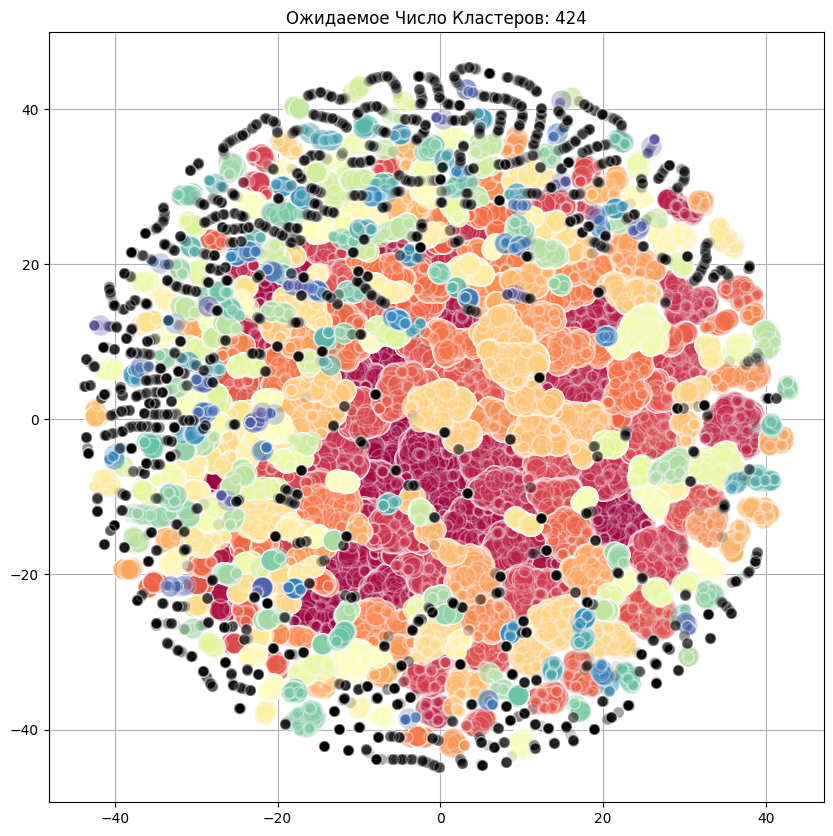

In [ ]:
#@title Кластеризация DBSCAN { run: "auto" }
#@markdown ### Выбор двух разных Главных Компонент
pca_x =  2 #@param {type:"slider", min:1, max:2, step:1}
pca_y = 1 #@param {type:"slider", min:1, max:2, step:1}
#@markdown ### epsilon
eps = 1 #@param {type:"slider", min:0.05, max:1.0, step:0.05}
#@markdown ### minimum sample
min_samples = 50 #@param {type:"slider", min:0, max:50, step:5}

X_cluster4 = df_del2.loc[:,['pca-'+str(pca_x), 'pca-'+str(pca_y)]].values

db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(X_cluster4)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0]

    class_member_mask = (labels == k)

    xy = X_cluster4[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=15, alpha=0.3)

    xy = X_cluster4[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=8, alpha=0.1)

plt.grid()
plt.title('Ожидаемое Число Кластеров: %d' % n_clusters_);

#### Кластеризация для данных с выборосами (без снижения размерности)

In [ ]:
df_num = df[num_columns]

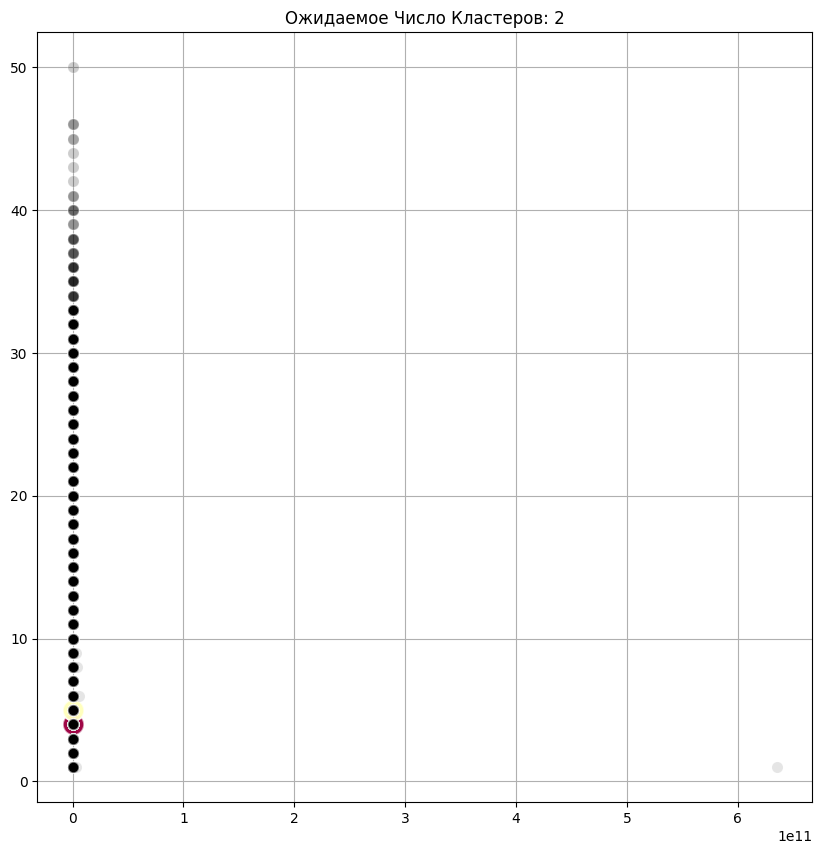

In [ ]:
#@title Кластеризация DBSCAN { run: "auto" }
#@markdown ### epsilon
eps = 0.4 #@param {type:"slider", min:0.05, max:1.0, step:0.05}
#@markdown ### minimum sample
min_samples = 10 #@param {type:"slider", min:0, max:50, step:5}

db = DBSCAN(eps=eps, min_samples=min_samples)
db.fit(df_num)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10,10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 0]

    class_member_mask = (labels == k)

    xy = df_num[class_member_mask & core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=15, alpha=0.3)

    xy = df_num[class_member_mask & ~core_samples_mask]
    plt.plot(xy.iloc[:, 0], xy.iloc[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='w', markersize=8, alpha=0.1)

plt.grid()
plt.title('Ожидаемое Число Кластеров: %d' % n_clusters_);

Выбросы не позволили внятно визуализировать результат

# Выводы

Применение алгоритма TSNE с последубщи применением DBSCAN не позволило внятным образом визуально разделить данные. Возможно это специфика датасета и в частности признака object_type (метка первичного или вторичного жилья).
Хотя я не исключаю варианта, что некорректно применил эти методы.